In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [3]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df= pd.read_csv('./beauty.csv', delimiter=',')

In [8]:
os.path.abspath('./')

'/home/guff/Downloads/emacs/data_analytics/ml-intro'

In [9]:
os.path.abspath('../../../')

'/home/guff/Downloads'

In [75]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [105]:
# for i in df['wage'].quantile([.25, .5, .75]):
#     print(i)

list(df['wage'].quantile([.25, .5, .75]))[0]
df['wage'].quantile([.25, .5, .75]).size
df['wage'].quantile([.25, .5, .75]).iloc[0]

# type(df['wage'].quantile([.25, .5, .75]))

3.7074999999999996

In [12]:
df.loc[df['female'] == 1].median()

wage         3.75
exper       11.50
union        0.00
goodhlth     1.00
black        0.00
female       1.00
married      0.00
service      0.00
educ        12.00
looks        3.00
dtype: float64

In [15]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [20]:
df.groupby(['female']).median()
# df.groupby(['female'])['wage'].median()

,wage,exper,union,goodhlth,black,married,service,educ,looks
female,,,,,,,,,
0,6.41,18.0,0.0,1.0,0.0,1.0,0.0,12.0,3.0
1,3.75,11.5,0.0,1.0,0.0,0.0,0.0,12.0,3.0


In [22]:
df.loc[0:3]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


In [ ]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

In [106]:
df.groupby(['female', 'married'])['wage'].mean()

female  married
0       0          5.989578
        1          7.716778
1       0          4.298879
        1          4.299859
Name: wage, dtype: float64

female  married
0       0          AxesSubplot(0.125,0.125;0.775x0.755)
        1          AxesSubplot(0.125,0.125;0.775x0.755)
1       0          AxesSubplot(0.125,0.125;0.775x0.755)
        1          AxesSubplot(0.125,0.125;0.775x0.755)
Name: wage, dtype: object

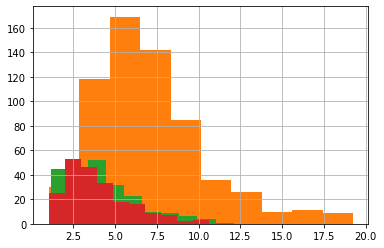

In [120]:
df.loc[df['wage'] < 20].groupby(['female', 'married'])['wage'].hist()

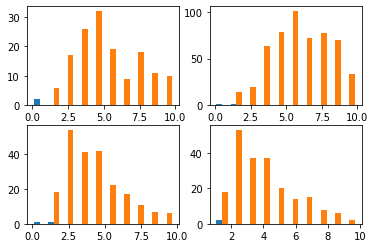

In [137]:
# how to create multiple plots from grouped dataFrame (on one plot is by default)

# for id, i in df.loc[df['wage'] < 20].groupby(['female', 'married'])['wage']:
# #     print(i)
#     i.hist()

w_h = df.loc[df['wage'] < 10].groupby(['female', 'married'])['wage']
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)


dl = list(w_h)
ax0.hist(dl[0])
ax1.hist(dl[1])
ax2.hist(dl[2])
ax3.hist(dl[3])


# fig.tight_layout()
plt.show()


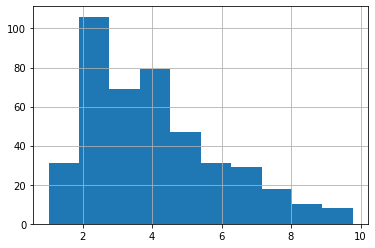

In [53]:

df.loc[(df['wage'] < 10) & (df['female'] == 1)]['wage'].hist()



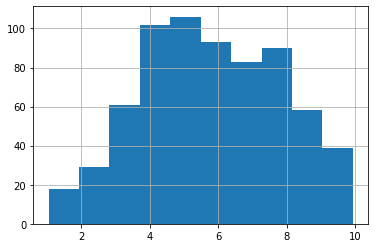

In [52]:
df.loc[(df['wage'] < 10) & (df['female'] == 0)]['wage'].hist()

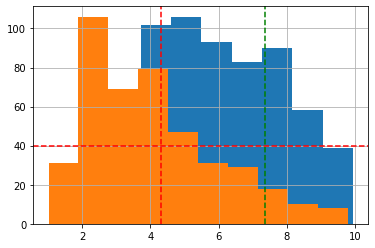

In [73]:

# df.loc[(df['female'] == 1)].head()

df.loc[(df['wage'] < 10)].groupby(['female'])['wage'].hist()

fe_w_mean = df.loc[(df['female'] == 1)]['wage'].mean()
ma_w_mean = df.loc[(df['female'] == 0)]['wage'].mean()

plt.axvline(ma_w_mean, color='g', linestyle='--')
plt.axvline(fe_w_mean, color='r', linestyle='--')


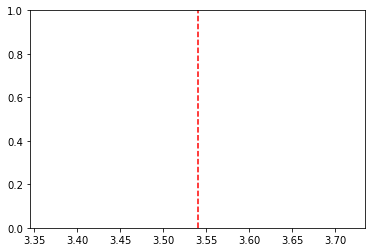

In [61]:
mean = 3.54
plt.axvline(mean, color='r', linestyle='--')

In [43]:
df[['wage', 'exper', 'educ']].head()

,wage,exper,educ
0,5.73,30,14
1,4.28,28,12
2,7.96,35,10
3,11.57,38,16
4,11.42,27,16


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb323307be0>,
      dtype=object)

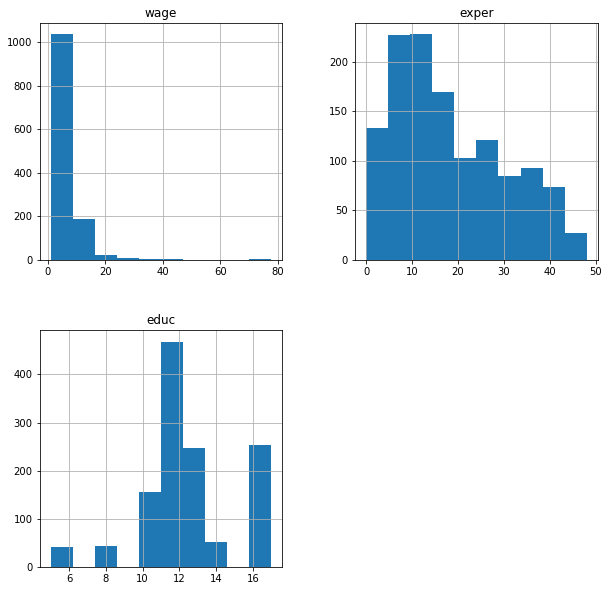

In [47]:
df[['wage', 'exper', 'educ']].hist(figsize=[10,10])

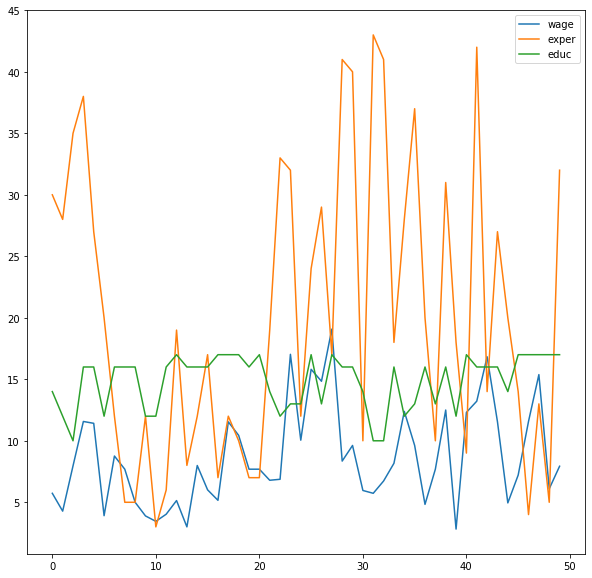

In [50]:
df[['wage', 'exper', 'educ']][0:50].plot(figsize=[10,10])